In [58]:
import matplotlib as mpl
mpl.use("pgf")
pgf_with_pdflatex = {
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
}
mpl.rcParams.update(pgf_with_pdflatex)
import matplotlib.pyplot as plt

%pylab inline
import numpy as np
import pylab as pb
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
pb.ion()

sns.set_context("paper")


Populating the interactive namespace from numpy and matplotlib


/Users/ggutierrez/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
`%matplotlib` prevents importing * from pylab and numpy


In [40]:
# first 4 columns are input: Wing-length, Wing-width, Tail-length, Arm-length
# last 2 columns are outputs in seconds (flight time for two trials)
data = np.genfromtxt('lab1_data.csv',delimiter=',')

# Data used for the plotting library
data2 = pd.read_csv('lab1_data.csv', names=["Wing-length", "Wing-width", "Tail-length", "Arm-length", "t1", "t2"])

X = data[:,0:4]
F = np.mean(data[:,4:6],axis=1)[:,None]

# Linear regression

## Q1 Plotting the data

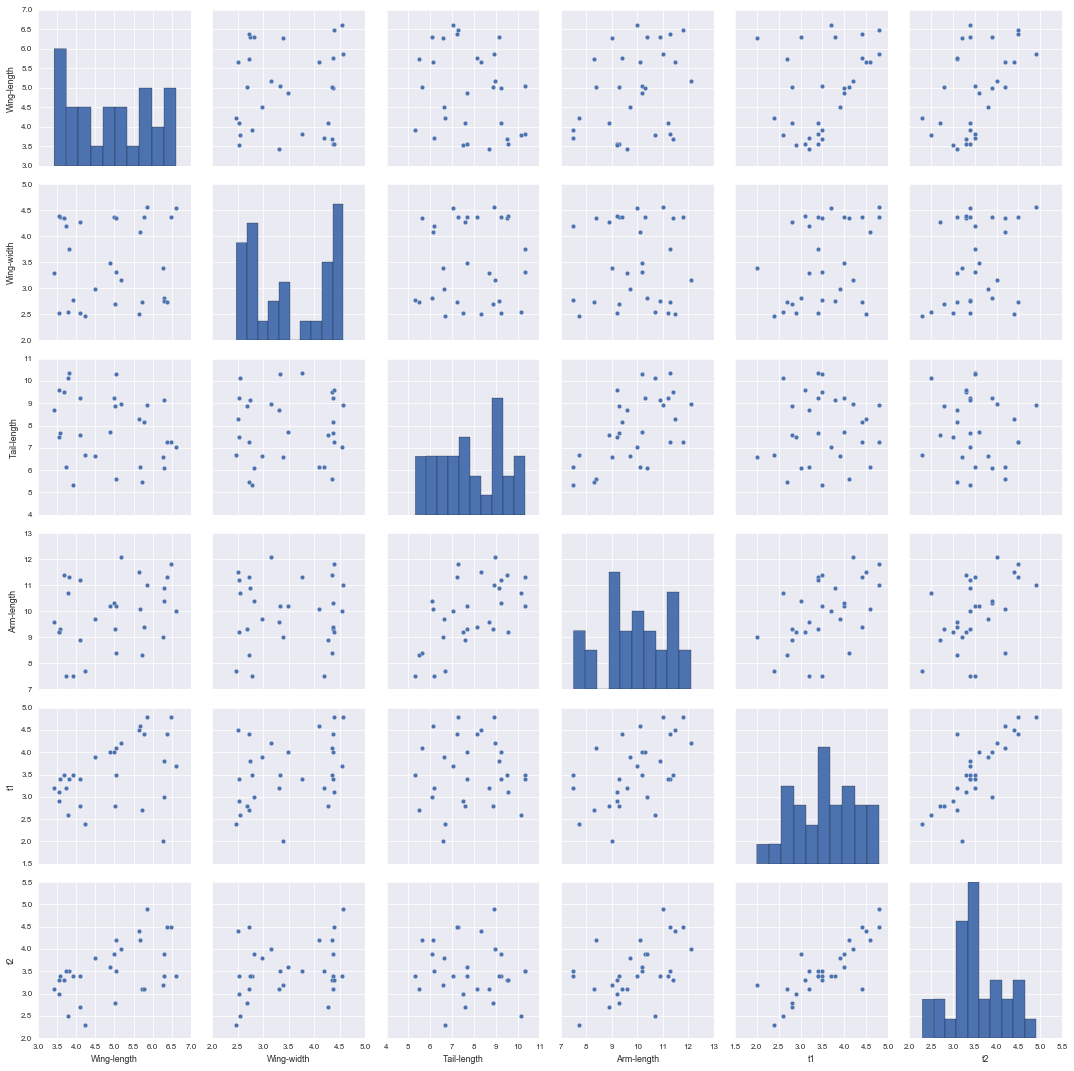

In [43]:
# To plot just the upper diagonal and the histogram
# g = sns.PairGrid(data2)
# g.map_upper(plt.scatter)
# g.map_diag(plt.hist)

sns.pairplot(data2)

After looking at data we can conclude:
- There is not much noise between the realizations of every experiment.

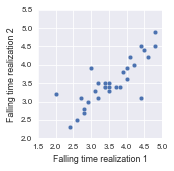

In [4]:
sns.pairplot(data2, x_vars=['t1'], y_vars=['t2'])
plt.xlabel('Falling time realization 1')
plt.ylabel('Falling time realization 2')
plt.savefig('t1_vs_t2.pgf')

In [5]:
np.mean(np.var(data[:,4:6],axis=1))

0.04250000000000001

- There is a linear correlation between the wing length and the falling time.

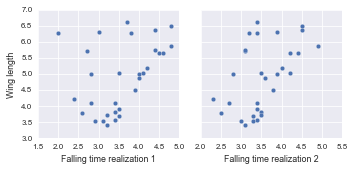

In [6]:
pg = sns.pairplot(data2, x_vars=['t1', 't2'], y_vars=['Wing-length'])
pg.axes[0,0].set_xlabel('Falling time realization 1')
pg.axes[0,1].set_xlabel('Falling time realization 2')
pg.axes[0,0].set_ylabel('Wing length')
plt.savefig('wing_length_vs_times.pgf')

- There is a linear correlation between the arm length and the falling time.

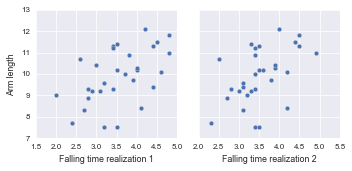

In [7]:
pg = sns.pairplot(data2, x_vars=['t1', 't2'], y_vars=['Arm-length'], kin)
pg.axes[0,0].set_xlabel('Falling time realization 1')
pg.axes[0,1].set_xlabel('Falling time realization 2')
pg.axes[0,0].set_ylabel('Arm length')
plt.savefig('arm_length_vs_times.pgf')

- It seems to be a small linear correlation between the arm length and the tail length.

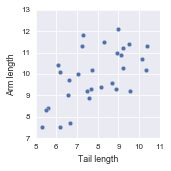

In [8]:
pg = sns.pairplot(data2, x_vars=['Tail-length'], y_vars=['Arm-length'])
pg.axes[0,0].set_xlabel('Tail length')
pg.axes[0,0].set_ylabel('Arm length')
plt.savefig('tail_length_vs_arm_length.pgf')

## Q2 Completing the linear regression

In [9]:
def bmatrix(a,fname):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :fname: file to write to
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    with open(fname, "w") as out_file:
        lines = str(a).replace('[', '').replace(']', '').splitlines()
        rv = [r'\begin{bmatrix}']
        rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
        rv +=  [r'\end{bmatrix}']
        out_file.write('\n'.join(rv))

In [49]:
def B(x):
    # function returning the matrix of basis functions evaluated at x
    #input:	  x, np.array with d columns
    #output:  a matrix of geberal term B_{i,j} = b_j(x_i)
    b0 = np.ones((x.shape[0],1)) # Constant effect
    b1 = (x[:,0])[:,None]        # Linear effect (wing length)
    #b1 = x[:,1:4]
    b2 = np.power(b1, 2)         # Cuadratic effect (wing length)
    #b2 = x[:,0:1]*x[:,3:4]
    B = np.hstack((b0,b1,b2))
    return B

Computes a linear regression for $X$ and $F$ as:

\begin{align*}
m(X) =& B(X)\hat{\beta} \\
m(X) =& B(X)(B(X)^t B(X))^{-1}B(X)^t F
\end{align*}

Returns the vector of coefficients $\hat{\beta}$ and the covariance matrix $covBeta$:

\begin{align*}
\hat{\beta} =& (B(X)^t B(X))^{-1}B(X)^t F \\
covBeta =& (B(X)^t B(X))^{-1}B(X)^t cov[\epsilon,\epsilon^t]B(X)(B(X)^t B(X))^{-1}
\end{align*}



In [68]:
def LR(X,F,B,tau2):
    #input:	  X, np.array with d columns representing the DoE
    #		  F, np.array with 1 column representing the observations
    #		  B, a function returning the (p) basis functions evaluated at x
    # 		  tau2, noise variance
    #output:  beta, estimate of coefficients np.array of shape (p,1)
    #		  covBeta, cov matrix of beta, np.array of shape (p,p)

    # ... to be completed ...
    BX = B(X)
    A = np.linalg.inv(np.dot(BX.T, BX))
    C = np.dot(A, BX.T)
    D = np.dot(BX, A)
    beta = np.dot(C, F)
    covBeta = np.dot(C,D)*tau2
    return(beta,covBeta)

tau2 = np.var(data[:,4] - data[:,5])/2.0
beta, covBeta = LR(X, F, B, tau2)
print("Estimate beta:\n {beta} \nCovariance matrix:\n {covBeta} ".format(
         beta=beta, covBeta=covBeta))
bmatrix(covBeta,'covBeta.tex')
bmatrix(beta, 'beta.tex')

Estimate beta:
 [[-0.17128791]
 [ 1.26127312]
 [-0.09838192]] 
Covariance matrix:
 [[ 2.35003664 -0.97643127  0.09710282]
 [-0.97643127  0.40906033 -0.04095428]
 [ 0.09710282 -0.04095428  0.00412636]] 


## Q3 Prediction

In [55]:
def predLR(x,B,beta,covBeta):
    #function returning predicted mean and variance
    #input:	  x, np.array with d columns representing m prediction points
    #		  B, a function returning the (p) basis functions evaluated at x
    #		  beta, estimate of the regression coefficients
    # 		  covBeta, covariance matrix of beta
    #output:  m, predicted mean at x, np.array of shape (m,1)
    #		  v, predicted variance matrix, np.array of shape (m,m)

    BB = B(x)
    m = np.dot(BB, beta)
    v = np.dot(BB,covBeta)
    v = np.dot(v,BB.T)
    return(np.asarray(m),np.asarray(v))

def plotModel(x,m,v):
	#input:	  x, np.array with d columns representing m prediction points
	#		  m, predicted mean at x, np.array of shape (m,1)
	#		  v, predicted variance matrix, np.array of shape (m,m)
    x = x.flatten()
    m = m.flatten()
    v = np.diag(v)
    #print x.shape, m.shape
    upper=m+2*np.sqrt(v)
    lower=m-2*np.sqrt(v)
    pb.plot(x,m,color="#204a87",linewidth=2)
    pb.fill(np.hstack((x,x[::-1])),np.hstack((upper,lower[::-1])),color="#729fcf",alpha=0.3)
    pb.plot(x,upper,color="#204a87",linewidth=0.2)
    pb.plot(x,lower,color="#204a87",linewidth=0.2)

def R2(X,F,B,beta):
    return(1-sum((F-np.dot(B(X),beta))**2)/sum((F-np.mean(F))**2))

0.23759945275593375

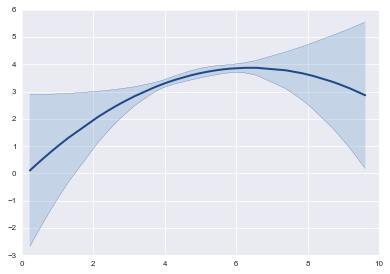

In [57]:
# Compute a linear regression with the experiment data
tau2 = np.var(data[:,4] - data[:,5])/2.0
(beta,covBeta) = LR(X,F,B,tau2)

# Use the LR to predict on random data
x = np.random.random_sample((50,X.shape[1]))*10.0
x = np.sort(x, axis=0)

mean_pred, cov_pred = predLR(x, B, beta, covBeta)
plotModel(x[:,0:1], mean_pred, cov_pred)
R2(X,F,B,beta)

0.19244081998047857

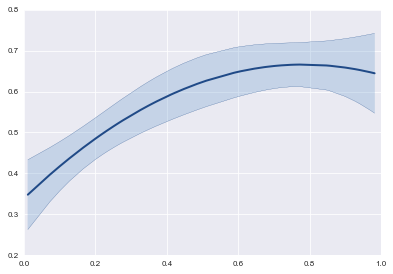

In [72]:
# Compute the linear regression on scaled data
scaler = preprocessing.MinMaxScaler(feature_range=(0.0,1.0))
Xscaled = scaler.fit_transform(data[:,0:4])
Yscaled = scaler.fit_transform(data[:,4:6])

Fscaled = np.mean(Yscaled[:,0:1],axis=1)[:,None]
tau2scaled = np.var(Yscaled[:,0] - Yscaled[:,1])/2.0
(betaScaled,covBetaScaled) = LR(Xscaled,Fscaled,B,tau2scaled)

# Predict for random generated data
x = np.random.random_sample((50,Xscaled.shape[1]))
x = np.sort(x, axis=0)

mean_pred, cov_pred = predLR(x, B, betaScaled, covBetaScaled)
plotModel(x[:,0:1], mean_pred, cov_pred)
R2(Xscaled,Fscaled,B,betaScaled)

In [14]:
#########################
## Question 4

def pvalue(beta,covBeta,X):
	df = X.shape[0] - len(beta)
	cdf = stats.t.cdf(np.abs(beta)/np.sqrt(np.diag(covBeta)),df)
	return(2*(1 - cdf))

#########################
## Question 5

## coordinate change
def angle(X):
	# X is Wing-length, Wing-width, Tail-length, Arm-length
	# returns the angle (in degrees) between the tail and the wing
    return(np.pi/180*np.arccos(-1.*((X[:,3]-2.5)**2-(X[:,2]-2.5)**2-X[:,0]**2)/(2*(X[:,2]-2.5)*X[:,0])))

def armLength(X):
	# X is Wing-length, Wing-width, Tail-length, angle (in degrees) between the tail and the wing
	# returns the arm length
	return(np.sqrt(X[:,0]**2+(X[:,2]-2.5)**2-2*np.cos(X[:,3]*180/np.pi)*X[:,0]*(X[:,2]-2.5))+2.5)


#########################
## Question 6